In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
from statsmodels.formula.api import ols

## 1. Making predictions

### 1.1. Predicting house prices

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

- Import the numpy package using the alias np.
- Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience, takes the integer values from zero to ten.
- Print explanatory_data.

In [2]:
taiwan_real_estate = pd.read_csv('../data/taiwan_real_estate2.csv')

In [3]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [4]:
# Inintializing and fitting the model:
model = ols(formula='price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

In [5]:
# Getting model paramerters:
model.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [6]:
# Creating some data for prediction:
prediction_data = pd.DataFrame({'n_convenience': np.arange(11)})

- Use the model mdl_price_vs_conv to make predictions from explanatory_data and store it as price_twd_msq.
- Print the predictions.

In [7]:
# Making predictions:
prediction_data['price_twd_msq'] = model.predict(prediction_data['n_convenience'])
prediction_data.head()

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556


### 1.2. Visualizing predictions

The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

- Create a new figure to plot multiple layers.
- Extend the plotting code to add points for the predictions in prediction_data. Color the points red.
- Display the layered plot.

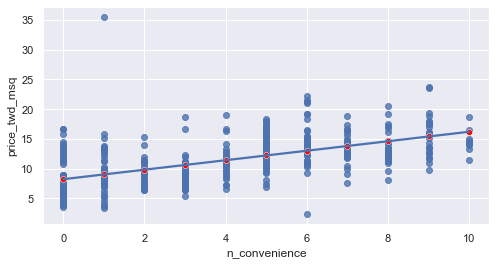

In [8]:
# Plotting predictions:
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq', ci=False, ax=ax)
sns.scatterplot(data=prediction_data, x='n_convenience', y='price_twd_msq', markers='s', color='red', ax=ax);

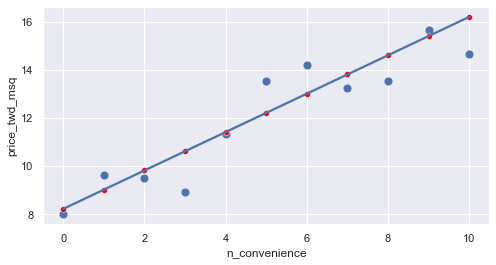

In [9]:
# Plotting predictions (after reducing the clutter):
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq', x_estimator=np.mean, ci=False, ax=ax)
sns.scatterplot(data=prediction_data, x='n_convenience', y='price_twd_msq', color='red', markers='s', ax=ax);

### 1.3. The limits of prediction

In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

- Create some impossible explanatory data. Define a DataFrame impossible with one column, n_convenience, set to -1 in the first row, and 2.5 in the second row.

In [10]:
# Creating an array of some impossible values:
impossible = pd.DataFrame({'n_convenience': [-1, 2.5]})

In [11]:
# Making preditions:
impossible['price_twd_msq'] = model.predict(impossible['n_convenience'])
impossible

,n_convenience,price_twd_msq
0,-1.0,7.426158
1,2.5,10.219437


## 2. Working with model objects

### 2.1. Extracting model elements

The model object created by ols() contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

In [12]:
# Getting the model parameters:
model.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [13]:
# Getting the fitted values:
model.fittedvalues.head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
dtype: float64

In [14]:
# Getting the residuals:
model.resid.head()

0   -4.737561
1   -2.638422
2    2.097013
3    4.366302
4    0.826211
dtype: float64

In [15]:
# Getting the results summary:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           3.41e-37
Time:                        12:23:58   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.2. Manually predicting house prices

You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

- Get the coefficients/parameters of mdl_price_vs_conv, assigning to coeffs.
- Get the intercept, which is the first element of coeffs, assigning to intercept.
- Get the slope, which is the second element of coeffs, assigning to slope.
- Manually predict price_twd_msq using the formula, specifying the intercept, slope, and explanatory_data.
- Run the code to compare your manually calculated predictions to the results from .predict().

In [16]:
# Getting the intercept and slope:
intercept, slope = model.params
intercept, slope

(8.224237452790334, 0.798079716612508)

In [17]:
# Making predictions manually:
manual_prediction = intercept + taiwan_real_estate['n_convenience'] * slope
manual_prediction.head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
Name: n_convenience, dtype: float64

In [18]:
# Comparing the results:
model.predict(taiwan_real_estate['n_convenience']).head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
dtype: float64

## 3. Regression to the mean

### 3.1. Home run!

Regression to the mean is an important concept in many areas, including sports.

Here you can see a dataset of baseball batting data in 2017 and 2018. Each point represents a player, and more home runs are better. A naive prediction might be that the performance in 2018 is the same as the performance in 2017. That is, a linear regression would lie on the "y equals x" line.

Explore the plot and make predictions. What does regression to the mean say about the number of home runs in 2018 for a player who was very successful in 2017?

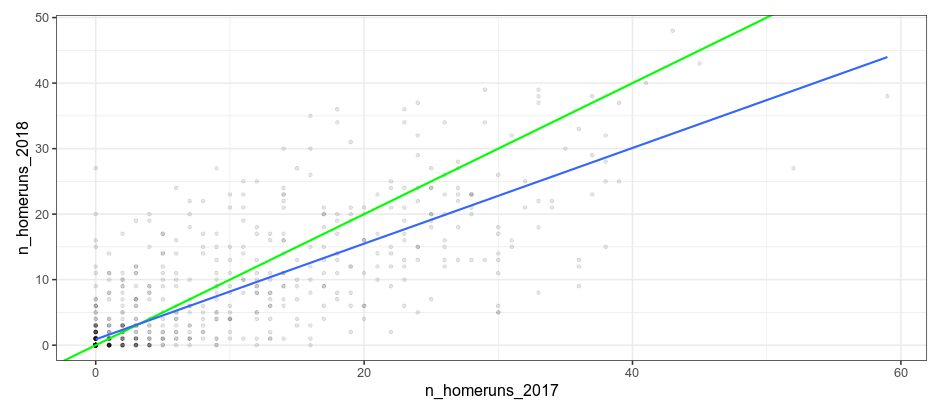

> - 
Someone who hit 40 home runs in 2017 is predicted to hit 10 fewer home runs the next year because regression to the mean states that, on average, extremely high values are not sustained.

### 3.2. Plotting consecutive portfolio returns

Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The sp500_yearly_returns dataset contains three columns:

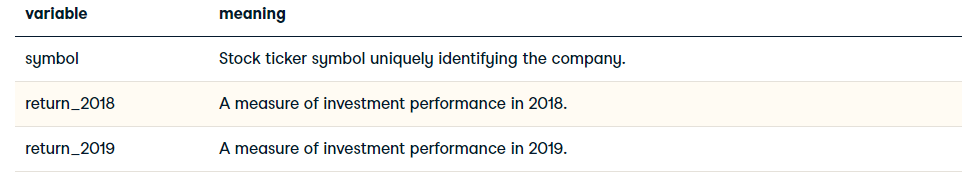

A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

- Create a new figure, fig, to enable plot layering.
- Generate a line at y equals x. This has been done for you.
- Using sp500_yearly_returns, draw a scatter plot of return_2019 vs. return_2018 with a linear regression trend line, without a standard error ribbon.
- Set the axes so that the distances along the x and y axes look the same.

In [19]:
sp500_yearly_returns = pd.read_csv('../data/sp500_yearly_returns.csv')

In [20]:
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


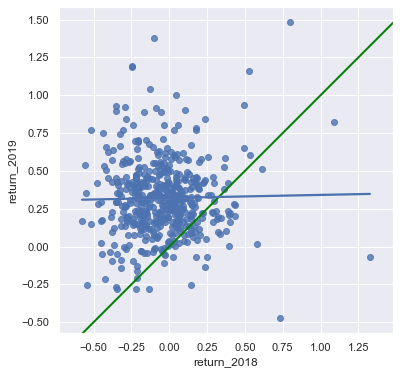

In [21]:
# Plotting 2018 Vs. 2019 return:
fig, ax = plt.subplots(figsize=(6, 6))
ax.axline(xy1=(0, 0), slope=1, linewidth=2, color='green')
sns.regplot(data=sp500_yearly_returns, x='return_2018', y='return_2019', ci=False, ax=ax)
ax.axis('equal');

### 3.3. Modeling consecutive returns

Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

- Run a linear regression on return_2019 versus return_2018 using sp500_yearly_returns and fit the model. Assign to mdl_returns.
- Print the parameters of the model.

In [22]:
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


In [23]:
# Initializing and fitting the model:
model = ols(formula='return_2019 ~ return_2018', data=sp500_yearly_returns).fit()

In [24]:
# Getting the model paramerters:
model.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

- Create a DataFrame named explanatory_data. Give it one column (return_2018) with 2018 returns set to a list containing -1, 0, and 1.
- Use mdl_returns to predict with explanatory_data in a print() call.

In [25]:
# Making predictions:
prediction_data = pd.DataFrame({'return_2018': [-1, 0, 1]})
model.predict(prediction_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64

## 4. Transforming variables

### 4.1. Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

- Look at the plot.
- Add a new column to taiwan_real_estate called sqrt_dist_to_mrt_m that contains the square root of dist_to_mrt_m.
- Create the same scatter plot as the first one, but use the new transformed variable on the x-axis instead.
- Look at the new plot. Notice how the numbers on the x-axis have changed. This is a different line to what was shown before. Do the points track the line more closely?

In [26]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [27]:
# Initializing and fitting the model:
model = ols(formula='price_twd_msq ~ dist_to_mrt_m', data=taiwan_real_estate).fit()

In [28]:
# Getting the model paramerters:
model.params

Intercept        13.873352
dist_to_mrt_m    -0.002197
dtype: float64

In [29]:
# Creating some data for prediction:
dist_to_mrt_m = np.arange(0, 81, 10)**2
prediction_data = pd.DataFrame({'dist_to_mrt_m': dist_to_mrt_m})

In [30]:
# Making predictions:
prediction_data['price_twd_msq_before'] = model.predict(prediction_data['dist_to_mrt_m'])

In [31]:
prediction_data.head()

,dist_to_mrt_m,price_twd_msq_before
0,0,13.873352
1,100,13.653622
2,400,12.994435
3,900,11.895788
4,1600,10.357684


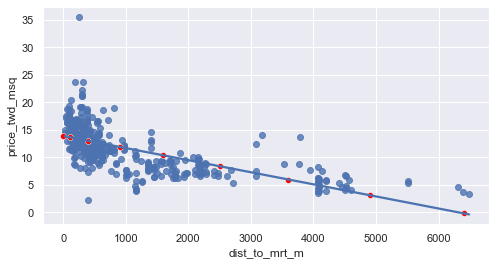

In [32]:
# Plotting dist_to_mrt_m Vs. price_twd_msq with predictions:
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(data=taiwan_real_estate, x='dist_to_mrt_m', y='price_twd_msq', ci=None, ax=ax)
sns.scatterplot(data=prediction_data, x='dist_to_mrt_m', y='price_twd_msq_before', color='red', ax=ax);

In [33]:
# Transforing the explanatory variable:
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

In [34]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m
0,84.87882,10,30 to 45,11.467474,9.212970
1,306.59470,9,15 to 30,12.768533,17.509846
2,561.98450,5,0 to 15,14.311649,23.706212
3,561.98450,5,0 to 15,16.580938,23.706212
4,390.56840,5,0 to 15,13.040847,19.762803


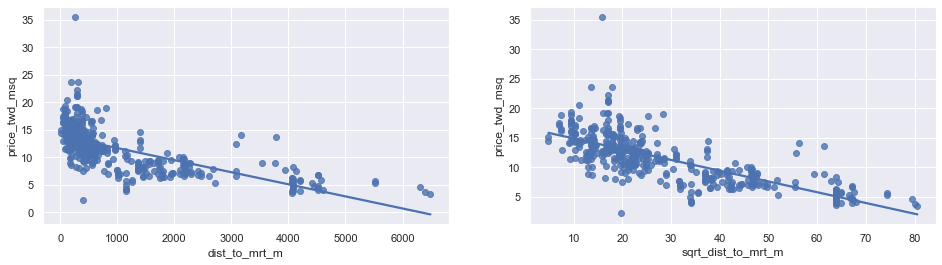

In [35]:
# Plotting sqrt_dist_to_mrt_m Vs. price_twd_msq:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.regplot(data=taiwan_real_estate, x='dist_to_mrt_m', y='price_twd_msq', ci=None, ax=ax1)
sns.regplot(data=taiwan_real_estate, x='sqrt_dist_to_mrt_m', y='price_twd_msq', ci=None, ax=ax2);

- Run a linear regression of price_twd_msq versus the square root of dist_to_mrt_m using taiwan_real_estate.
- Print the parameters.

In [36]:
# Initializing and fitting the model:
model = ols(formula='price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

In [37]:
# Getting the model paramerters:
model.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

- Create a DataFrame of predictions named prediction_data by adding a column of predictions called price_twd_msq to explanatory_data. Predict using mdl_price_vs_dist and explanatory_data.
- Print the predictions.

In [38]:
# Creating some data for prediction:
prediction_data['sqrt_dist_to_mrt_m'] = np.sqrt(prediction_data['dist_to_mrt_m'])

In [39]:
prediction_data.head()

,dist_to_mrt_m,price_twd_msq_before,sqrt_dist_to_mrt_m
0,0,13.873352,0.0
1,100,13.653622,10.0
2,400,12.994435,20.0
3,900,11.895788,30.0
4,1600,10.357684,40.0


In [40]:
# Making predictions:
prediction_data['price_twd_msq_after'] = model.predict(prediction_data['sqrt_dist_to_mrt_m'])

In [41]:
prediction_data.head()

,dist_to_mrt_m,price_twd_msq_before,sqrt_dist_to_mrt_m,price_twd_msq_after
0,0,13.873352,0.0,16.709799
1,100,13.653622,10.0,14.881370
2,400,12.994435,20.0,13.052942
3,900,11.895788,30.0,11.224513
4,1600,10.357684,40.0,9.396085


- Add a layer to your plot containing points from prediction_data, colored "red".

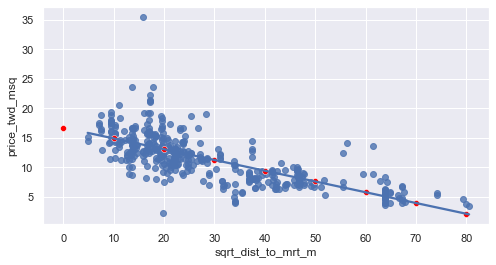

In [42]:
# Plotting sqrt_dist_to_mrt_m Vs. price_twd_msq with predictions:
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(data=taiwan_real_estate, x='sqrt_dist_to_mrt_m', y='price_twd_msq', ci=None, ax=ax)
sns.scatterplot(data=prediction_data, x='sqrt_dist_to_mrt_m', y='price_twd_msq_after', color='red', ax=ax);

### 4.2. Transforming the response variable too

The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

- Look at the plot.
- Create a qdrt_n_impressions column using n_impressions raised to the power of 0.25.
- Create a qdrt_n_clicks column using n_clicks raised to the power of 0.25.
- Create a regression plot using the transformed variables. Do the points track the line more closely?

In [43]:
ad_conversion = pd.read_csv('../data/ad_conversion.csv')

In [44]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


In [45]:
ad_conversion['qdrt_n_impressions'] = ad_conversion['n_impressions']**0.25
ad_conversion['qdrt_n_clicks'] = ad_conversion['n_clicks']**0.25

In [46]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


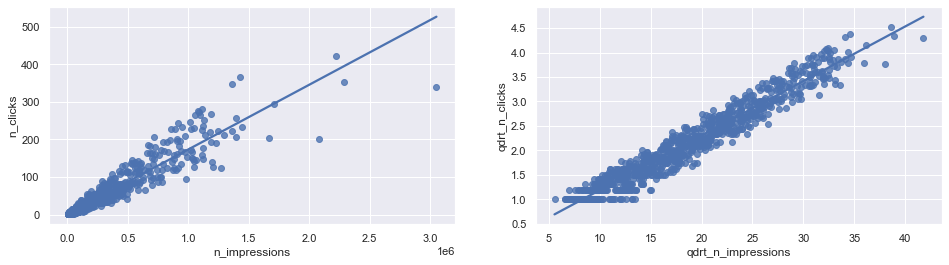

In [47]:
# Plotting qdrt_n_impressions Vs. qdrt_n_clicks:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.regplot(data=ad_conversion, x='n_impressions', y='n_clicks', ci=None, ax=ax1)
sns.regplot(data=ad_conversion, x='qdrt_n_impressions', y='qdrt_n_clicks', ci=None, ax=ax2);

- Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions using ad_conversion and assign it to mdl_click_vs_impression.

In [48]:
# Initializing and fitting the model:
model = ols(formula='qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()

In [49]:
# Getting the model paramerters:
model.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

- Complete the code to create the prediction data.

In [50]:
# Creating some data for prediction:
n_impressions = np.arange(0, 3e6+1, 5e5)
qdrt_n_impressions = n_impressions ** 0.25
prediction_data = pd.DataFrame({'n_impressions': n_impressions, 'qdrt_n_impressions': qdrt_n_impressions})

In [51]:
prediction_data.head()

,n_impressions,qdrt_n_impressions
0,0.0,0.000000
1,500000.0,26.591479
2,1000000.0,31.622777
3,1500000.0,34.996355
4,2000000.0,37.606031


### 4.3. Back transformation

In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

- Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.

In [52]:
# Back transformation:
prediction_data['qdrt_n_clicks'] = model.predict(prediction_data['qdrt_n_impressions'])
prediction_data['n_clicks'] = prediction_data['qdrt_n_clicks'] ** 4

In [53]:
prediction_data.head()

,n_impressions,qdrt_n_impressions,qdrt_n_clicks,n_clicks
0,0.0,0.000000,0.071748,0.000026
1,500000.0,26.591479,3.037576,85.135121
2,1000000.0,31.622777,3.598732,167.725102
3,1500000.0,34.996355,3.974998,249.659131
4,2000000.0,37.606031,4.266063,331.214159


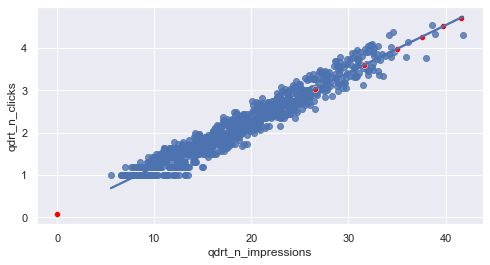

In [54]:
# Plotting qdrt_n_impressions Vs. qdrt_n_clicks with predictions:
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(data=ad_conversion, x='qdrt_n_impressions', y='qdrt_n_clicks', ci=None, ax=ax)
sns.scatterplot(data=prediction_data, x='qdrt_n_impressions', y='qdrt_n_clicks', color='red', ax=ax);